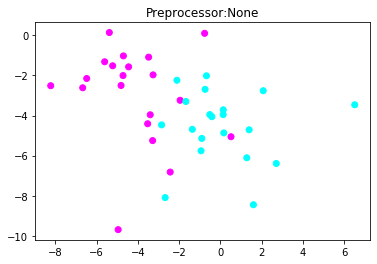

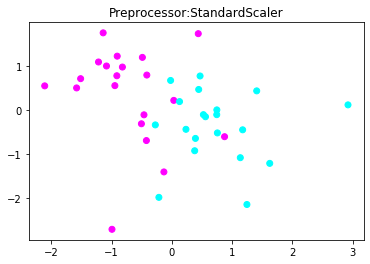

In [1]:
# 使用StandardScaler进行数据的预处理
# 导入科学计算库
import numpy as np
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数据集生成工具
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=50, cluster_std=2)
# 用散点图绘制图像
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:None')
plt.show()
# 可以看到特征1的数据值范围在-8~7之间，特征2的特征值在-10~0之间。

# 导入StandardScaler
from sklearn.preprocessing import StandardScaler
# 使用StandardScaler进行数据的预处理
X_1 = StandardScaler().fit_transform(X)
# 用散点图绘制预处理过的数据点
plt.scatter(X_1[:, 0], X_1[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:StandardScaler')
plt.show()
# 可以看到数据经过预处理后，特征1的数值在-2~3之间，特征2的值在-3~2之间。

# 经过对比两张图发现数据点的位置并没有发生变化，而仅仅是坐标轴发生了变化。
# StandardScaler的原理是将数据的特征值转化为均值为0，方差为1的状态。

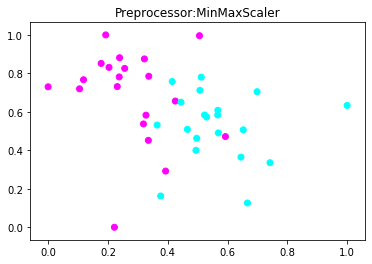

In [2]:
# 使用MinMaxScaler进行数据预处理
# 导入MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_2 = MinMaxScaler().fit_transform(X)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:MinMaxScaler')
plt.show()

# 可以看到数据的特征值都被转换为0~1之间，可以想象成将数据都压缩在1x1的方格里，这样可以使模型训练的速度更快且准确率也会提高。

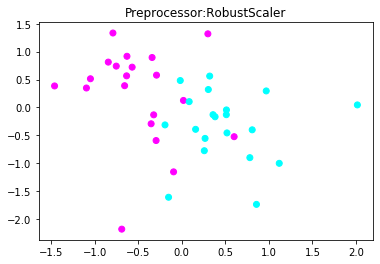

In [3]:
# 使用RobustScaler进行数据预处理
# 导入RobustScaler
from sklearn.preprocessing import RobustScaler
X_3 = RobustScaler().fit_transform(X)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:RobustScaler')
plt.show()

# 可以看到数据的特征1范围在-1.5~2.0之间，而特征2的范围在-2~1.5之间。
# RobustScaler和StandardScaler的图像比较类似。
# 但是实现的方法不同，它使用中位数和四分位数，使用暴力的方式进行缩放，把一些异常值剔除。

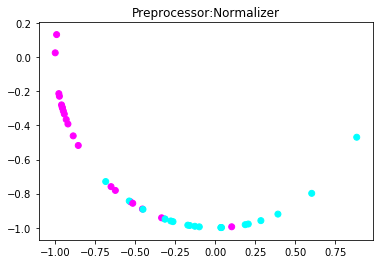

In [4]:
# 使用Normalizer进行数据预处理，它的原理是将所有样本的特征向量转换成欧几里德距离为1，也就是说它将数据的分布变成一个半径为1的圆或者球。
# 它通常出现在只需要保留特征向量的方向而忽略其值的场合。
# 导入Normalizer
from sklearn.preprocessing import Normalizer
X_4 = Normalizer().fit_transform(X)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:Normalizer')
plt.show()


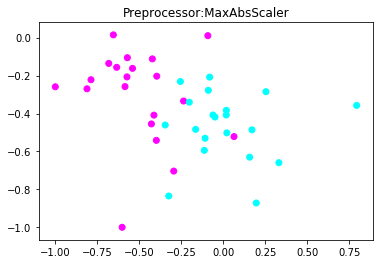

In [5]:
# 使用MaxAbsScaler进行数据预处理
from sklearn.preprocessing import MaxAbsScaler
X_5 = MaxAbsScaler().fit_transform(X)
plt.scatter(X_5[:, 0], X_5[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:MaxAbsScaler')
plt.show()

# 该方法通过每个特征绝对值的最大值来缩放。

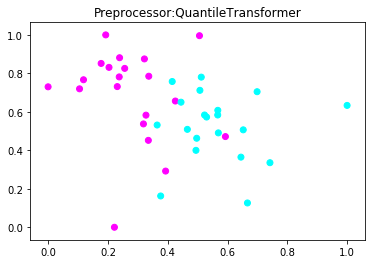

In [6]:
# 使用QuantileTransformer进行数据预处理
from sklearn.preprocessing import QuantileTransformer
X_6 = QuantileTransformer(n_quantiles=2).fit_transform(X)
plt.scatter(X_6[:, 0], X_6[:, 1], c=y, cmap=plt.cm.cool)
plt.title('Preprocessor:QuantileTransformer')
plt.show()

# 该方法通过指定的分位数来对数据的特征值进行缩放。
# 可以看到在二分位数时数据点的分布和StandardScaler差不多。

In [1]:
# 通过数据预处理提升模型的准确率
# 导入红酒数据集
from sklearn.datasets import load_wine
# 导入MLP神经网络
from sklearn.neural_network import MLPClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 建立训练集和测试集
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=62)
# 打印数据形态
print(X_train.shape, X_test.shape)
# 可以看到训练集中有133个样本，测试集中有45个样本，每个样本都有13个特征变量。

# 训练MLP神经网络
mlp = MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=1000, random_state=62)
# 使用MLP拟合数据
mlp.fit(X_train, y_train)
# 打印模型得分
print('model score without preprocess: {:.2f}'.format(mlp.score(X_test, y_test)))

(133, 13) (45, 13)
model score without preprocess: 0.29


In [2]:
# 使用MinMaxScaler进行数据预处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_pp = scaler.fit_transform(X_train)
X_test_pp = scaler.fit_transform(X_test)
mlp.fit(X_train_pp, y_train)
print('model score after preprocess: {:.2f}'.format(mlp.score(X_test_pp, y_test)))

# 数据经过预处理之后分数从0.29飙升到1.00，就是说MLP模型对数据完美分类。

model score after preprocess: 1.00


In [5]:
# 数据降维
# 主成分分析法（Principal Component Analysis，PCA），它通过提取样本中关键的特征值来降低模型的复杂度。
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = wine.data
y = wine.target
X_scaled = scaler.fit_transform(X)
print("wine's shape after scaled:", X_scaled.shape)
# 可以看到有178个样本，每个样本各有13个特征变量


wine's shape after scaled: (178, 13)


In [10]:
# 使用PCA进行数据预处理（数据降维）
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 设置主成分数量为2便于可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("wine's shape after PCA:", X_pca.shape)
# 可以看到178个样本的特征数量只剩下2个了


wine's shape after PCA: (178, 2)


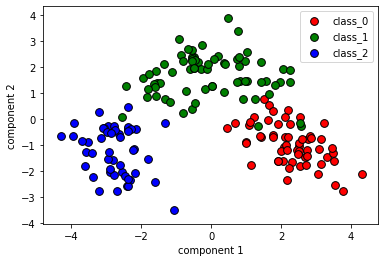

In [13]:
# 使用PCA降维的数据进行可视化处理
X0 = X_pca[wine.target == 0]
X1 = X_pca[wine.target == 1]
X2 = X_pca[wine.target == 2]
# 绘制散点图
plt.scatter(X0[:, 0], X0[:, 1], c='r', s=60, edgecolors='k')
plt.scatter(X1[:, 0], X1[:, 1], c='g', s=60, edgecolors='k')
plt.scatter(X2[:, 0], X2[:, 1], c='b', s=60, edgecolors='k')
# 设置图注
plt.legend(wine.target_names, loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()


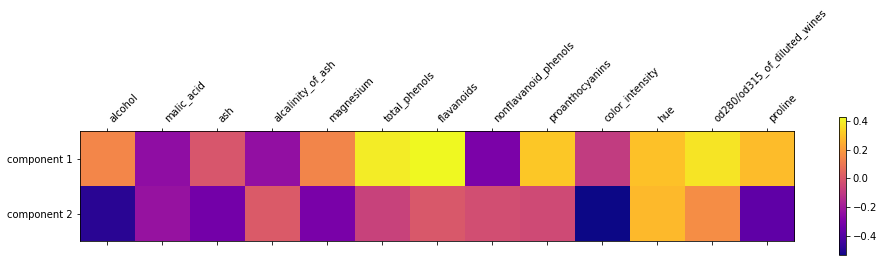

In [23]:
# PCA只提取了2个主特征进行分析，但是实际上并没有抛弃其余的11个特征，而是会根据它们和主成分之间的关系保留其数据（内积和投影）
# 使用主成分绘制热度图
plt.matshow(pca.components_, cmap='plasma')
# 纵轴为主成分
plt.yticks([0, 1], ['component 1', 'component 2'])
plt.colorbar()
# 横轴为原始特征
plt.xticks(range(len(wine.feature_names)), wine.feature_names, rotation=45, ha='left')
plt.show()
# 颜色由暖色调到冷色调依次表示为正相关到负相关，代表数据集的每个特征值和主成分之间的关系
# 另外PCA中的n_components参数不仅可以为整数，代表降维后主成分的个数，还可以为小数，代表的是设置为降维后保留信息的百分比


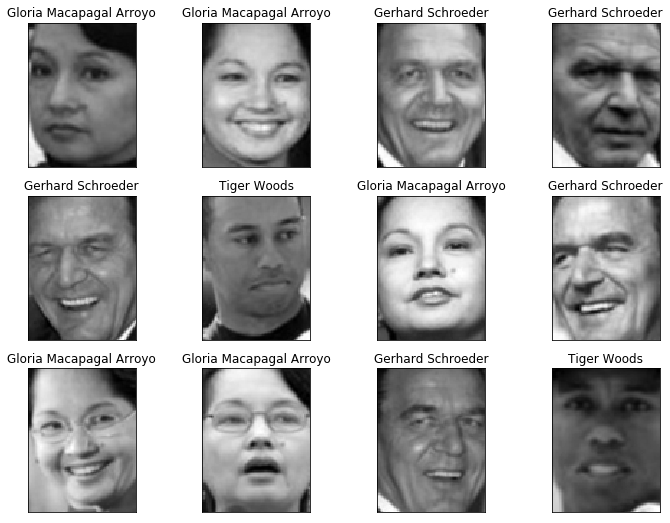

In [18]:
# 特征提取
# 导入数据集获取工具，人脸数据集
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
# print(faces.keys())
# print(faces['DESCR'])
image_shape = faces.images[0].shape
# 将图片打印出来
fig, axes = plt.subplots(3, 4, figsize=(12, 9), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(faces.target, faces.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(faces.target_names[target])
    
plt.show()


In [20]:
# 导入神经网络
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# 对数据进行拆分 这里将数据除以255是为了便于处理灰度图的像素点
X_train, X_test, y_train, y_test = train_test_split(faces.data/255, faces.target, random_state=62)
# 训练神经网络
mlp = MLPClassifier(hidden_layer_sizes=[100, 100], random_state=62, max_iter=400)
mlp.fit(X_train, y_train)

print('moduel\'s score:{:.2f}'.format(mlp.score(X_test, y_test)))


moduel's score:0.83


In [25]:
# 通过数据白化（data whiten）提高模型的表现
# 虽然每个人的面部特征有很大差异，但如果从像素级别进行观察，差距其实没那么大，而且相邻的像素之间有很大的相关性，
# 这样一来，样本特征的输入就是冗余的了，白化的目的就是为了降低冗余性。
# 白化的过程会让样本特征之间的相关度降低，，且所有特征具有相同的方差。

# 使用白化功能处理人脸数据
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, whiten=True, random_state=62).fit(X_train)
X_train_whiten = pca.transform(X_train)
X_test_whiten = pca.transform(X_test)
print('data shape after whiten:{}'.format(X_train_whiten.shape))

# 使用白化后的数据训练神经网络
mlp.fit(X_train_whiten, y_train)
print('moduel\'s score after whiten:{:.2f}'.format(mlp.score(X_test_whiten, y_test)))
# 可以看出PCA的数据白化功能对提升神经网络模型的准确率有一定的帮助。


data shape after whiten:(89, 32)


moduel's score after whiten:0.87
